Importing necessary libraries and modules

In [1]:
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy as np
import tqdm

Getting the data

In [2]:
data=pd.read_csv('../../data/data_clean.csv')

In [3]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## Columns and their descriptions:

**distance_from_home**: how far from home the transaction was made 

**distance_from_last_transaction**: how far from the last transcation the new transaction was 

**ratio_to_median_purchase_price**: ratio of purchase price of the transcation to the median of all purchase prices 

**repeat_retailer**: how many times the credit-card-holder purchased from the same retailer 

**used_chip**: was the chip used for the transaction? (0 for No 1 for Yes) 

**used_pin_number**: was the pin number used for the transaction? (0 for No 1 for Yes)

**online_order**: was it an online order? (0 for No 1 for Yes)

**fraud**: was it fraud or not? (0 for No 1 for Yes) 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Checking the types of the columns 

In [5]:
data.shape

(1000000, 8)

In [6]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

There are no nulls

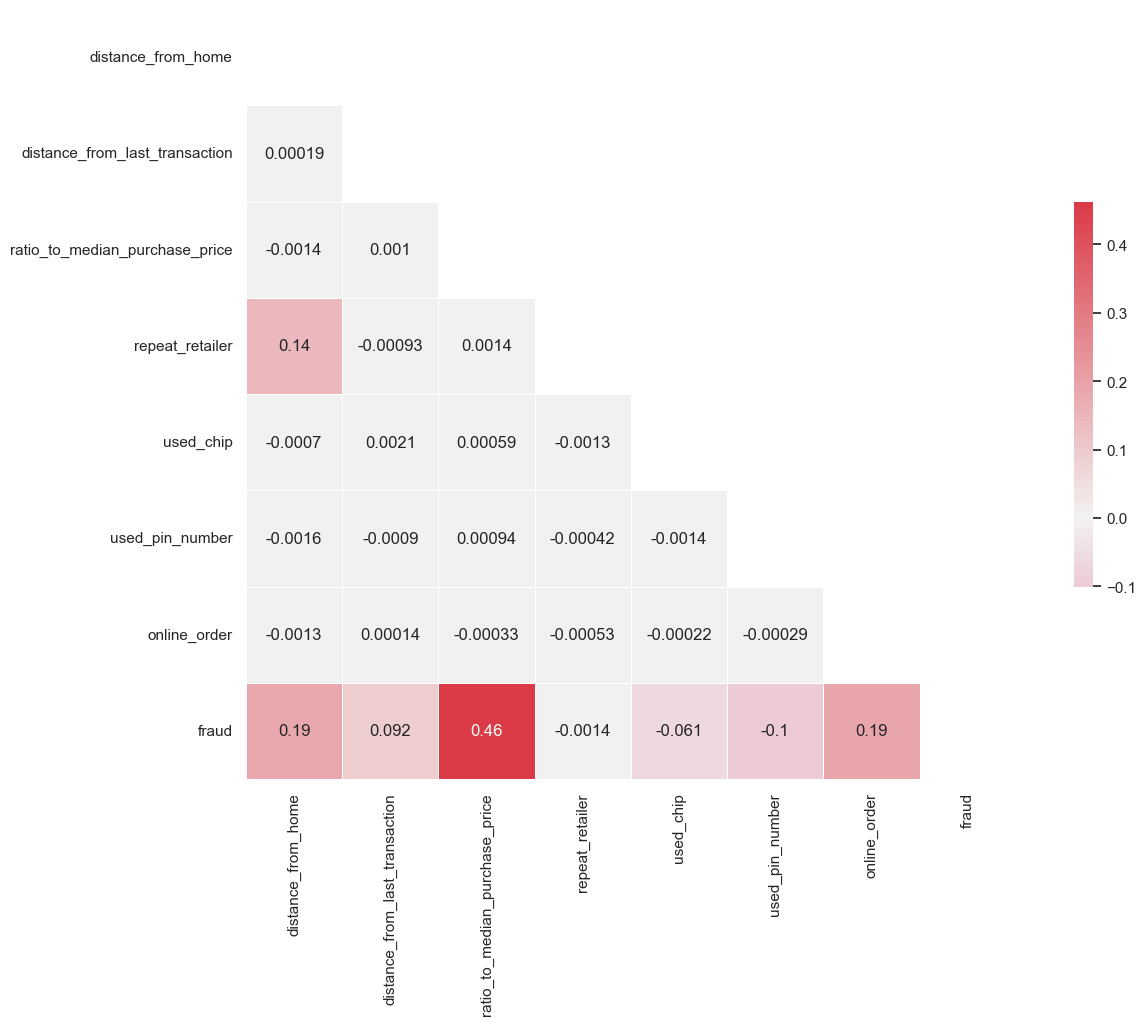

In [7]:
#Checking the correlations 

plt.figure(figsize=(15, 10))  

sns.set(style='white')    

mask=np.triu(np.ones_like(data.corr(), dtype=bool))    

cmap=sns.diverging_palette(0, 10, as_cmap=True)   


sns.heatmap(data.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

The goal of this project is to create a model that will predict fraud. Therefore my target is column 'fraud'. In the figure above are the correlations of the dataframe. I am particularly interested in the correlations between 'fraud' and the rest of the columns. The most correlated column to 'fraud' would be 'ratio_to_media_purchase_price' with 0.46 . Then 'distance_from_home' and 'online_order' seem to be the ones that follow. The column that has the least correlation to 'fraud' is 'repeat_retailer'. 

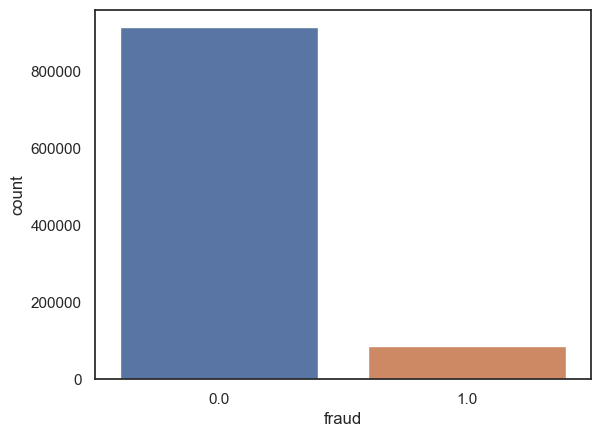

In [8]:
sns.countplot(x ='fraud', data = data)
 
plt.show()

In [9]:
data['fraud'].value_counts() / data.shape[0]

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

As we can see from the bar chart above the fraud an non-fraud cases are not  balanced. 

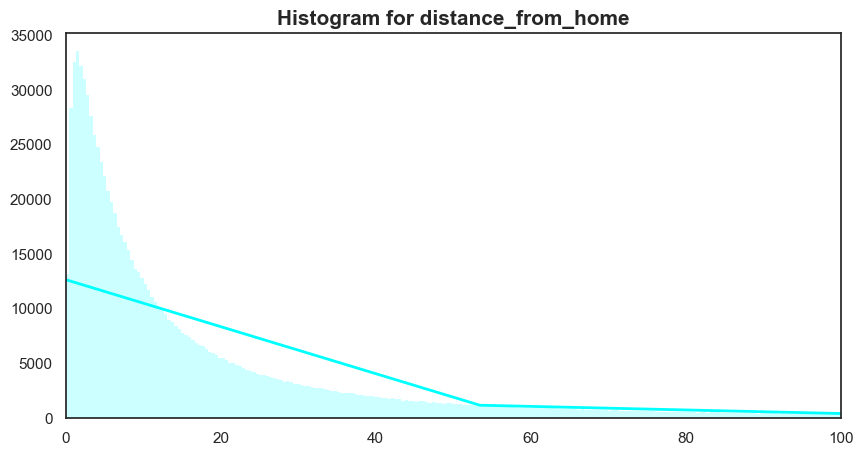

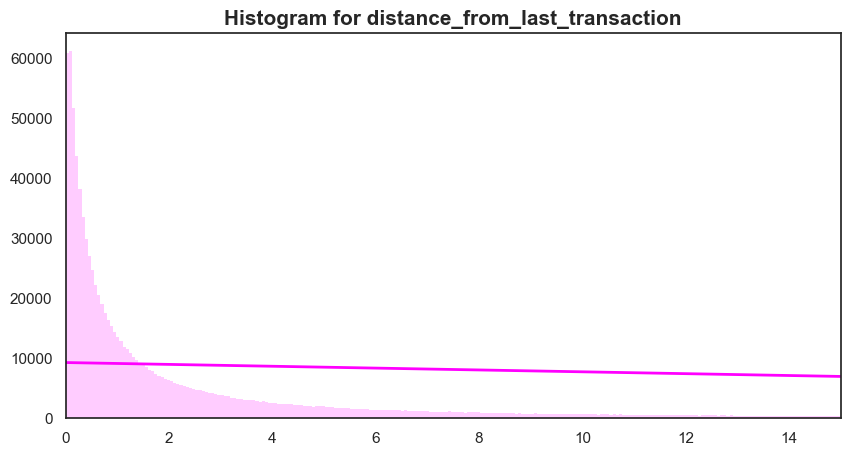

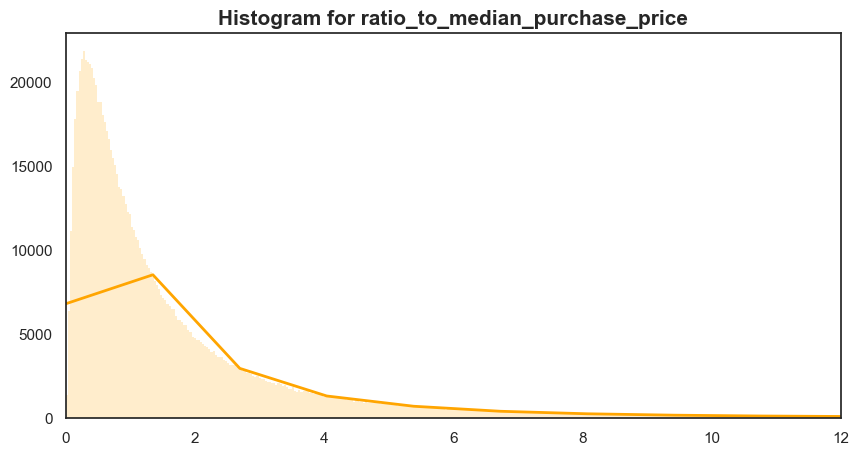

In [10]:
#Seeing the distributions of the numeric columns
x_limits_distance_from_home = (0, 100)  
x_limits_distance_from_last_transaction = (0, 15)  
x_limits_ratio_to_median_purchase_price = (0, 12)  

num_bins = 100

# distance from home plot
plt.figure(figsize=(10, 5))
sns.histplot(
    data=data,
    x='distance_from_home',
    kde=True,
    color='cyan',
    line_kws={"linewidth": 2},
    alpha=0.2,
)
plt.title('Histogram for distance_from_home', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xlim(x_limits_distance_from_home)
plt.show()

# distance form last transaction plot
plt.figure(figsize=(10, 5))
sns.histplot(
    data=data,
    x='distance_from_last_transaction',
    kde=True,
    color='magenta',
    line_kws={"linewidth": 2},
    alpha=0.2,
)
plt.title('Histogram for distance_from_last_transaction', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xlim(x_limits_distance_from_last_transaction)
plt.show()

# ratio to median purchase price plot
plt.figure(figsize=(10, 5))
sns.histplot(
    data=data,
    x='ratio_to_median_purchase_price',
    kde=True,
    color='orange',
    line_kws={"linewidth": 2},
    alpha=0.2,
)
plt.title('Histogram for ratio_to_median_purchase_price', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xlim(x_limits_ratio_to_median_purchase_price)
plt.show()


Above you can see the distributions of non-boolean numerical columns 'distance_from_home', 'distance_from_last_transaction' and 'ratio_to_median_purchase_price'

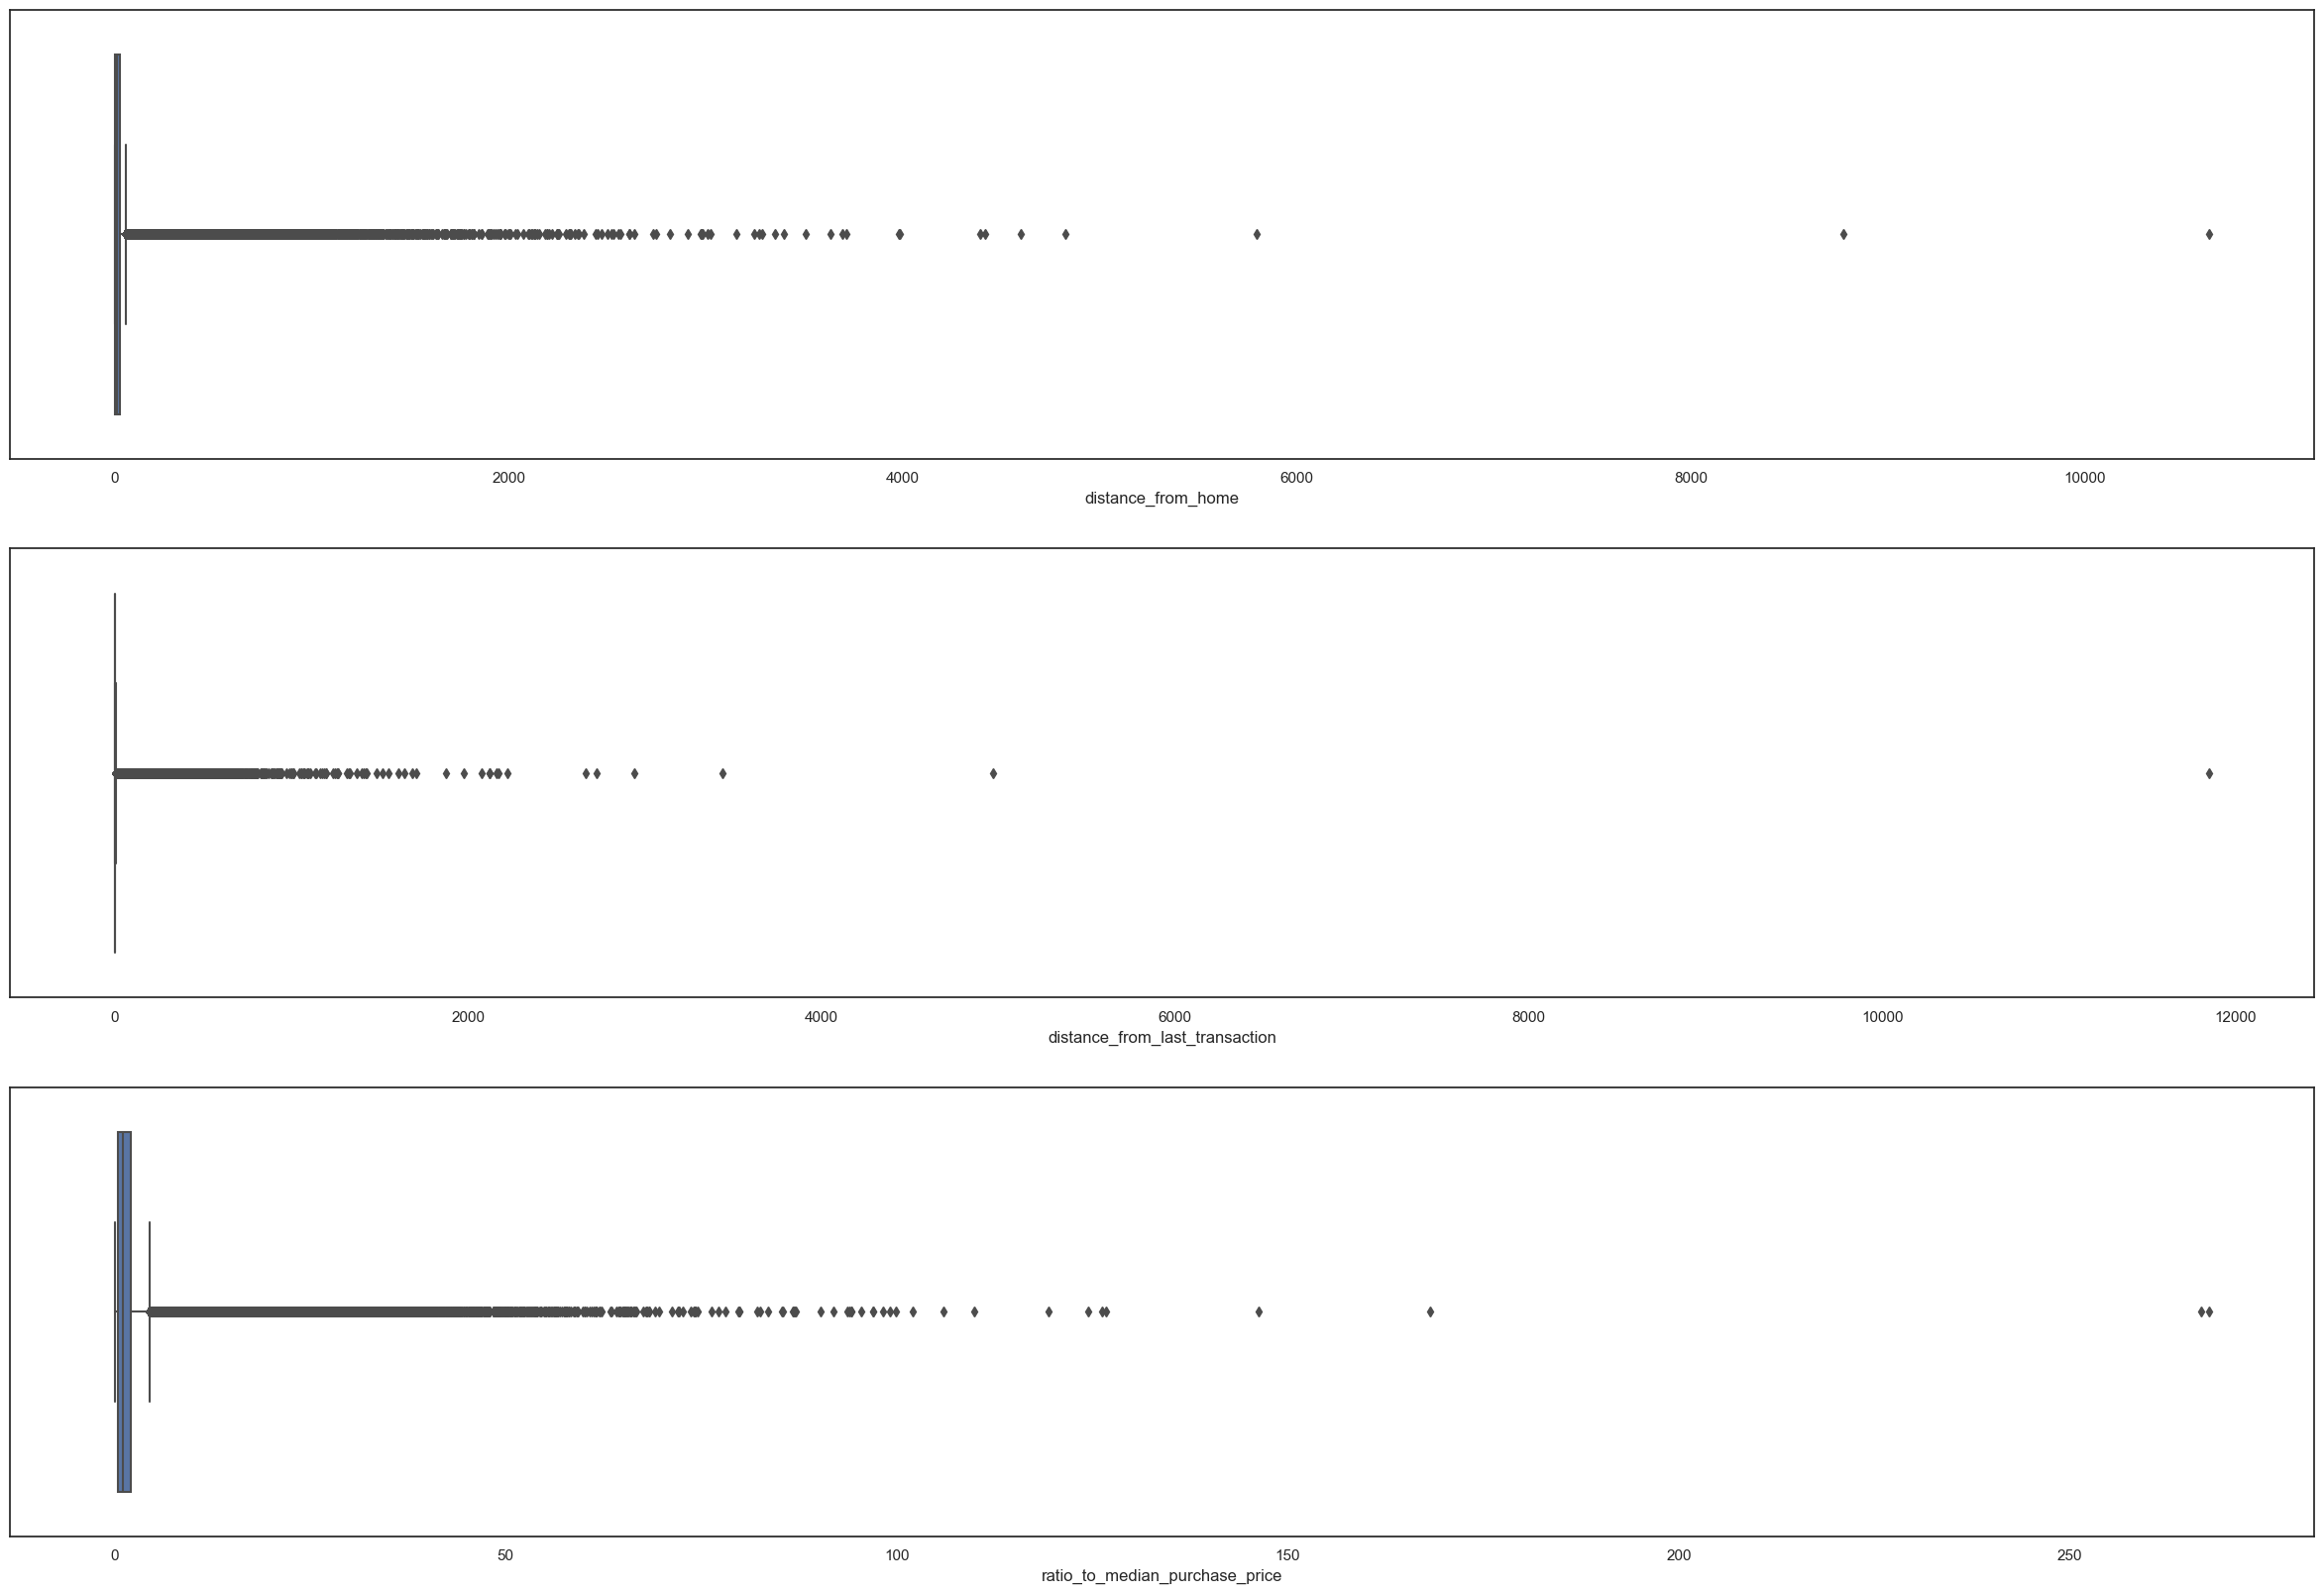

In [11]:
#plotting the outliers 
fig, ax = plt.subplots(3, 1, figsize=(30,20))
df=data[['distance_from_home', 'distance_from_last_transaction','ratio_to_median_purchase_price']]
for i in range(len(df.columns)):
    sns.boxplot(x=df.columns[i], data=df, ax=ax[i])
plt.show()


As you can see above there are quite a few outliers

In [12]:
data[data['fraud']==1].describe().T    #exploring fraudulent transactions

,count,mean,std,min,25%,50%,75%,max
distance_from_home,87403.0,66.261876,134.391608,0.025847,4.585729,15.454219,101.110104,10632.723672
distance_from_last_transaction,87403.0,12.712185,47.997697,0.000407,0.328199,1.157631,4.598504,2160.499922
ratio_to_median_purchase_price,87403.0,6.006323,5.564320,0.011966,3.500270,5.071294,7.331222,266.689692
repeat_retailer,87403.0,0.880119,0.324825,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,87403.0,0.256399,0.436647,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,87403.0,0.003123,0.055801,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,87403.0,0.946318,0.225391,0.000000,1.000000,1.000000,1.000000,1.000000
fraud,87403.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data[data['fraud']==0].describe().T    #exploring non-fraudulent transactions

,count,mean,std,min,25%,50%,75%,max
distance_from_home,912597.0,22.832976,52.828655,0.004874,3.828942,9.673847,24.158057,8777.136420
distance_from_last_transaction,912597.0,4.301391,22.472359,0.000118,0.293859,0.985074,3.268578,11851.104565
ratio_to_median_purchase_price,912597.0,1.423642,1.946152,0.004399,0.449768,0.913950,1.788918,267.802942
repeat_retailer,912597.0,0.881672,0.322997,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,912597.0,0.359402,0.479825,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,912597.0,0.109944,0.312821,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,912597.0,0.622225,0.484831,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,912597.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## From the two tables above we can see that fraudulent transactions tend to:

* happen at higher distances from home that non-fraudulent transactions (mean for fraud is 66.26 while mean for non-fraud is 22.95)

* happen at higher distances from the last transaction that non-fraudulent transactions (mean for fraud is 12.71 while mean for non-fraud is 4.26)

* have higher ratio to median purchase prices (mean for fraud is 6.00 while mean for non-fraud is 1.44)

* use the chip less (mean for fraud is 0.26 while mean for non-fraud is 0.39)

* use the pin number less (mean for fraud is 0.00 while mean for non-fraud is 0.11)

* order online more (mean for fraud is 0.95 while for non-fraud is 0.62)


As for repeating retailers we see once again that there is not much difference between fraudulent and non-fraudulent transactions


## Let´s see the above conclusions visually

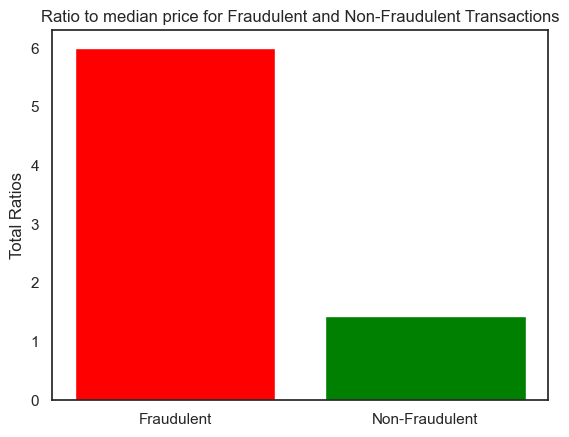

In [14]:

fraudulent_data = data[data['fraud'] == 1]
non_fraudulent_data = data[data['fraud'] == 0]

total_amount_fraudulent = fraudulent_data['ratio_to_median_purchase_price'].mean()
total_amount_non_fraudulent = non_fraudulent_data['ratio_to_median_purchase_price'].mean()

categories = ['Fraudulent', 'Non-Fraudulent']
amounts = [total_amount_fraudulent, total_amount_non_fraudulent]

plt.bar(categories, amounts, color=['red', 'green'])
plt.title('Ratio to median price for Fraudulent and Non-Fraudulent Transactions')
plt.ylabel('Total Ratios')
plt.show()


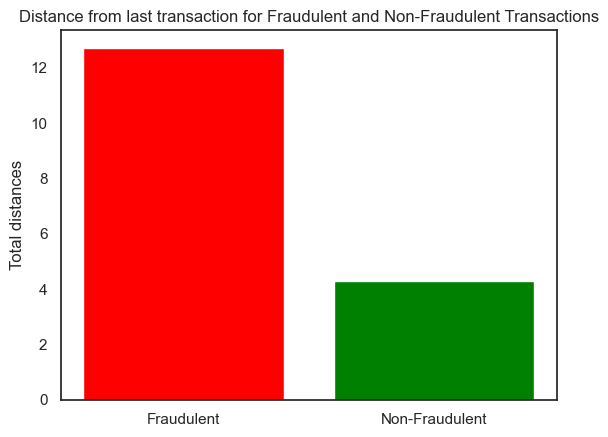

In [15]:
fraudulent_data = data[data['fraud'] == 1]
non_fraudulent_data = data[data['fraud'] == 0]

total_distance_fraudulent = fraudulent_data['distance_from_last_transaction'].mean()
total_distance_non_fraudulent = non_fraudulent_data['distance_from_last_transaction'].mean()

categories = ['Fraudulent', 'Non-Fraudulent']
amounts = [total_distance_fraudulent, total_distance_non_fraudulent]

plt.bar(categories, amounts, color=['red', 'green'])
plt.title('Distance from last transaction for Fraudulent and Non-Fraudulent Transactions')
plt.ylabel('Total distances')
plt.show()


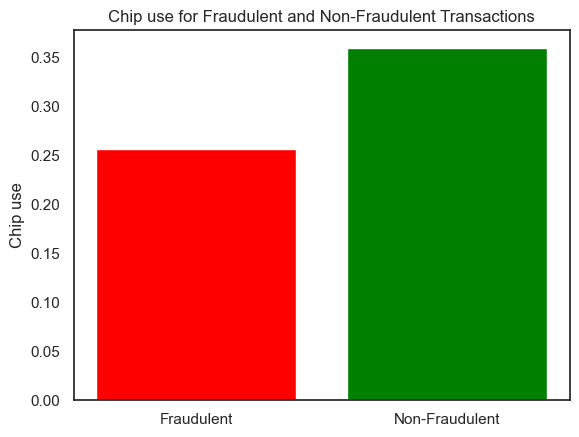

In [16]:
fraudulent_data = data[data['fraud'] == 1]
non_fraudulent_data = data[data['fraud'] == 0]

total_chip_fraudulent = fraudulent_data['used_chip'].mean()
total_chip_non_fraudulent = non_fraudulent_data['used_chip'].mean()

categories = ['Fraudulent', 'Non-Fraudulent']
amounts = [total_chip_fraudulent, total_chip_non_fraudulent]

plt.bar(categories, amounts, color=['red', 'green'])
plt.title('Chip use for Fraudulent and Non-Fraudulent Transactions')
plt.ylabel('Chip use')
plt.show()


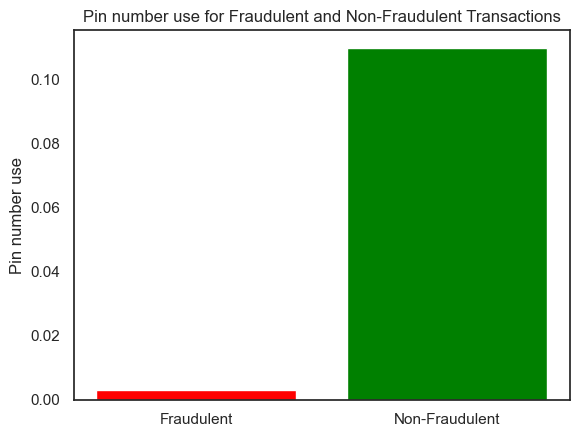

In [17]:
fraudulent_data = data[data['fraud'] == 1]
non_fraudulent_data = data[data['fraud'] == 0]

total_pin_fraudulent = fraudulent_data['used_pin_number'].mean()
total_pin_non_fraudulent = non_fraudulent_data['used_pin_number'].mean()

categories = ['Fraudulent', 'Non-Fraudulent']
amounts = [total_pin_fraudulent, total_pin_non_fraudulent]

plt.bar(categories, amounts, color=['red', 'green'])
plt.title('Pin number use for Fraudulent and Non-Fraudulent Transactions')
plt.ylabel('Pin number use')
plt.show()


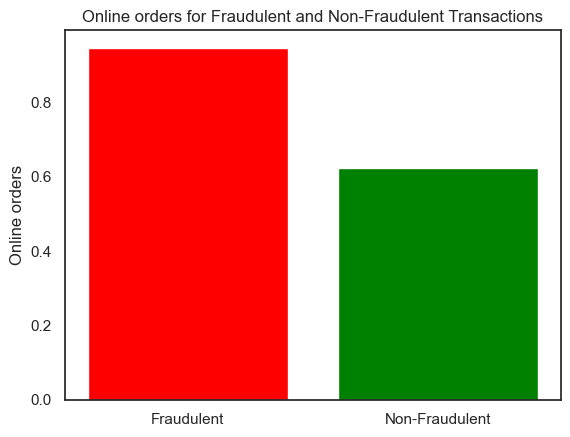

In [18]:
fraudulent_data = data[data['fraud'] == 1]
non_fraudulent_data = data[data['fraud'] == 0]

total_online_fraudulent = fraudulent_data['online_order'].mean()
total_online_non_fraudulent = non_fraudulent_data['online_order'].mean()

categories = ['Fraudulent', 'Non-Fraudulent']
amounts = [total_online_fraudulent, total_online_non_fraudulent]

plt.bar(categories, amounts, color=['red', 'green'])
plt.title('Online orders for Fraudulent and Non-Fraudulent Transactions')
plt.ylabel('Online orders')
plt.show()
